<a href="https://colab.research.google.com/github/DroidZed/miniProject_Polynomial_Regression/blob/main/polynomial_regression_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the Crypto Market Cap Growth

This notebook serves as an analysis tool for the Crypto market. It explores a 24-hour updating [dataset](https://www.kaggle.com/datasets/adrianjuliusaluoch/crypto-and-stock-market-data-for-financial-analysis) to approximate the deviation in exchange and understand the market growth trajectory.

# Project Overview

- **Data Analysis**: Analyse the dataset, display graphs to understand relationships and split the data for training and testing.
- **Cross validation**: test the model using Time Series Cross-validation and visualise its performance on new data.
- **Model training and evaluation**: Train the model on the training data.
- **Visualisation**: visualise the resulsts across testings to compare the predictions's accuracy.

# Polynomial Regression

## Recap: what is a polynomial?

In mathematics, a polynomial is a mathematical expression consisting of indeterminates (also called variables) and coefficients, that involves only the operations of addition, subtraction, multiplication and exponentiation to nonnegative integer powers, and has a finite number of terms. An example of a polynomial of a single indeterminate $x$ is $P(X)=x²-4x+7$. With three indeterminates: $P(X)=x^{3}+2xyz^{2}-yz+1$.

The order/degree of a polynomial is the value of its biggest power: A polynomial of order 2 can constist of at most power 2 variables: $P(X)=x + 4x²$. It's not necessary for all the powers of $x$ to be present. We can have a singular (not very useful) variable polynomial ($\alpha * x²$) and still be called an order 2 polynomial.

## The math behind Polynomial Regression:

In statistics, it is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as a polynomial $y=P(X)$. Therefore, the model won't be able to fit a non linear data as it will fail to understand the relationships between data points resulting from $n$-power polynomials.

At a mathematical level, a ploynomial regression should look like this:

$$y = \beta₀ + \beta₁x + \beta₂x² + \beta₃x³ + … + \betaₙxⁿ + \epsilon$$

Where:
- $y$ -> Dependent variable (what you’re predicting).
- $x$ -> Independent variable (your input).
- $\beta₀, \beta₁, \beta₂, …, \betaₙ$ -> Coefficients for each degree of $x$.
- $x², x³, …, xⁿ$: higher-order terms that add more flexibility.
- $\epsilon$ -> The error/risidual term from calculations.

## Key terms:

* **Outlier**: An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

* **Underfitting**: When your model is too simple to capture the underlying pattern in the data. Imagine trying to fit a straight line to a dataset that clearly follows a curve. Linear regression, while simple, can suffer from underfitting when the relationship isn’t linear.

* **Overfitting**: It occurs when your model is too complex, capturing every tiny fluctuation in the data, including noise. This might make your training performance look stellar, but when new data comes along, the model falls apart.

## Comparison with Linear model

<center>
    <img src="attachment:229b7c0c-9823-4090-9b1f-ac14ba028a63.webp" alt="Comparison with Linear model" style="margin:auto" />
</center>
<br>

At its core, polynomial regression is an extension of linear regression. But some differences are present making it more suitable for real world scenarios:

|                     	| Polynomial Regression           	| Linear Regression                                	|
|-----------------------|-----------------------------------|---------------------------------------------------|
| Type of data to use 	| Unstable data                   	| Linear data. Assumes a constant rate of change.  	|
| Graph shape         	| Curves                          	| Straight line                                    	|
| Complexity          	| Complex to read and manipulate. 	| Easier to read, understand and lighter to compute |

## Use-cases

Thanks to its flexibility, polynomial regression can easily handle real world data. A modal fit for constant change with non linear progression.

Polynomial regression finds its way in various real world scenarios, including but not limited to:
- **Finance**: modeling stock trends.
- **Health-care**: predicting growth patterns.
- **Manufacturing**: analysing system performance curves.

## Pros and pitfalls
**Pros:**
- **Flexibility**: Can model a wide range of relationships.
- **Better Fit**: Can capture non-linear trends in the data.
- **Varied applicability**: Thanks to its flexible nature, we can explore a wide range of fields with volatile behavior.

**Pitfalls:**
- **Computational Complexity**: As the degree of the polynomial increases, so does the computational cost.
- **Overfitting & Underfitting**: Prone to overfitting with higher-degree polynomials and underfitting with low-degrees. Therefore we need cross validation to reduce errors.
- **Sensitivity to Outliers**: More sensitive to outliers compared to linear regression.

# Environment Preparation

In [ ]:
# Libraries installation
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
# Importing libraries (just check the correctness of the import by showing the version)
from datetime import timedelta
import time

import pandas as pd
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy as scp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, jarque_bera, skew, kurtosis
import warnings

print(f"Pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {mtb.__version__}")
print(f"seaborn version: {sb.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scp.__version__}")

Pandas version: 2.3.2
numpy version: 2.3.3
matplotlib version: 3.10.6
seaborn version: 0.13.2
scikit-learn version: 1.7.2
scipy version: 1.16.2


In [46]:
# Load dataset (show data shape, print first n lines of the data)

data = pd.read_csv("data/stocks.csv")

In [47]:
print(f"data Shape = {data.shape}")

data Shape = (135328, 9)


In [48]:
# Printing the first N lines of the data
n = 10
print(f"First {n} lines of the data")
data.head(n)

First 10 lines of the data


,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-09-18 02:00:00,Boeing,214.68,218.05,213.13,-0.34,-0.16%,5.31M,15:59:59
1,2025-09-18 02:00:00,Chevron,160.10,160.67,158.61,0.56,+0.35%,4.02M,15:59:59
2,2025-09-18 02:00:00,Citigroup,101.76,102.21,100.41,1.12,+1.11%,13.61M,15:59:59
3,2025-09-18 02:00:00,Caterpillar,450.62,452.34,443.00,9.95,+2.26%,4.31M,15:59:59
4,2025-09-18 01:30:00,Walt Disney,116.11,116.66,115.22,0.88,+0.76%,5.57M,15:59:59
5,2025-09-18 01:30:00,Cisco,67.72,67.88,66.38,0.79,+1.18%,17.52M,15:59:59
6,2025-09-18 01:30:00,Goldman Sachs,794.22,798.57,785.23,8.69,+1.11%,1.79M,15:59:59
7,2025-09-18 01:30:00,JPMorgan,311.75,312.91,308.77,2.56,+0.83%,8.41M,15:59:59
8,2025-09-18 01:30:00,Coca-Cola,67.04,67.13,66.41,0.80,+1.20%,12.43M,15:59:59
9,2025-09-18 01:30:00,McDonald’s,305.00,306.58,303.91,1.71,+0.56%,2.59M,15:59:59


# Data Analysis

In [49]:
# Clean and process data (show data shape)

In [91]:
# Get dataframe columns:
print(f"Dataframe columns: {data.columns}\n")

def clean_data(data):
    # Renaming the chg_, chg_% and vol_ columns to make them more readable:
    updated_cols = {'chg_': 'change','chg_%': 'change_percentage','vol_': 'volume'}

    # Ommit the 'inplace' argument to get a copy of the original dataframe with updated columns.
    data.rename(columns=updated_cols, inplace = True)

    def process_percentage(v: str) -> float:
        try:
            new = v.replace('%', '').replace('+', '')
    
            return float(new)
        except:
            return v
    
    def process_volume(v: str) -> float:
        try:
            new = v.replace('M', '').replace('K', '')
    
            return float(new)
        except:
            return v

    data['change_percentage'] = data['change_percentage'].apply(lambda x: process_percentage(x))
    data['volume'] = data['volume'].apply(lambda x: process_volume(x))

    return data

print("Visualising the new data with updated columns and cleaned rows:")

cleaned = clean_data(data)
data.head(5)


Dataframe columns: Index(['timestamp', 'name', 'last', 'high', 'low', 'change',
       'change_percentage', 'volume', 'time'],
      dtype='object')

Visualising the new data with updated columns and cleaned rows:


,timestamp,name,last,high,low,change,change_percentage,volume,time
0,2025-09-18 02:00:00,Boeing,214.68,218.05,213.13,-0.34,-0.16,5.31,15:59:59
1,2025-09-18 02:00:00,Chevron,160.10,160.67,158.61,0.56,0.35,4.02,15:59:59
2,2025-09-18 02:00:00,Citigroup,101.76,102.21,100.41,1.12,1.11,13.61,15:59:59
3,2025-09-18 02:00:00,Caterpillar,450.62,452.34,443.00,9.95,2.26,4.31,15:59:59
4,2025-09-18 01:30:00,Walt Disney,116.11,116.66,115.22,0.88,0.76,5.57,15:59:59


In [51]:
# Removing Nan values:
print(f"OLD data Shape = {data.shape}")

data.dropna()

print(f"NEW data Shape = {data.shape}")

OLD data Shape = (135328, 9)
NEW data Shape = (135328, 9)


In [52]:
# Extract numeric columns and convert to numpy arrays
numeric_columns = ['last', 'high', 'low', 'change', 'change_percentage', 'volume']
names = data['name'].values  # NumPy array of stock names

# Create numpy arrays from DataFrame columns
last_prices = data['last'].values
high_prices = data['high'].values
low_prices = data['low'].values
changes = data['change'].values
change_percentages = data['change_percentage'].values
volumes = data['volume'].values

# Combine all numeric data into a 2D numpy array
numeric_data = np.column_stack([last_prices, high_prices, low_prices, changes, change_percentages, volumes])
feature_names = np.array(['last', 'high', 'low', 'change', 'change_percentage', 'volume'])

# Create DataFrame for seaborn compatibility
data_numeric = pd.DataFrame(numeric_data, columns=feature_names, index=names)


print(f"Original DataFrame shape: {data.shape}")
print(f"Numeric data shape: {numeric_data.shape}")
print(f"Features: {feature_names}")
print(f"Stock names: {names}")
print(f"\nFirst few rows of numeric data:")
data_numeric.head()

Original DataFrame shape: (135328, 9)
Numeric data shape: (135328, 6)
Features: ['last' 'high' 'low' 'change' 'change_percentage' 'volume']
Stock names: ['Boeing' 'Chevron' 'Citigroup' ... 'Coca-Cola' 'P&amp;G' 'Nike']

First few rows of numeric data:


,last,high,low,change,change_percentage,volume
Boeing,214.68,218.05,213.13,-0.34,-0.16,5.31
Chevron,160.10,160.67,158.61,0.56,0.35,4.02
Citigroup,101.76,102.21,100.41,1.12,1.11,13.61
Caterpillar,450.62,452.34,443.00,9.95,2.26,4.31
Walt Disney,116.11,116.66,115.22,0.88,0.76,5.57


In [53]:
# Data visualisation (histogramm, pair plot, box plot, corralation heatmap, feature distrubion)

plt.style.use('default')
sb.set_palette("husl")

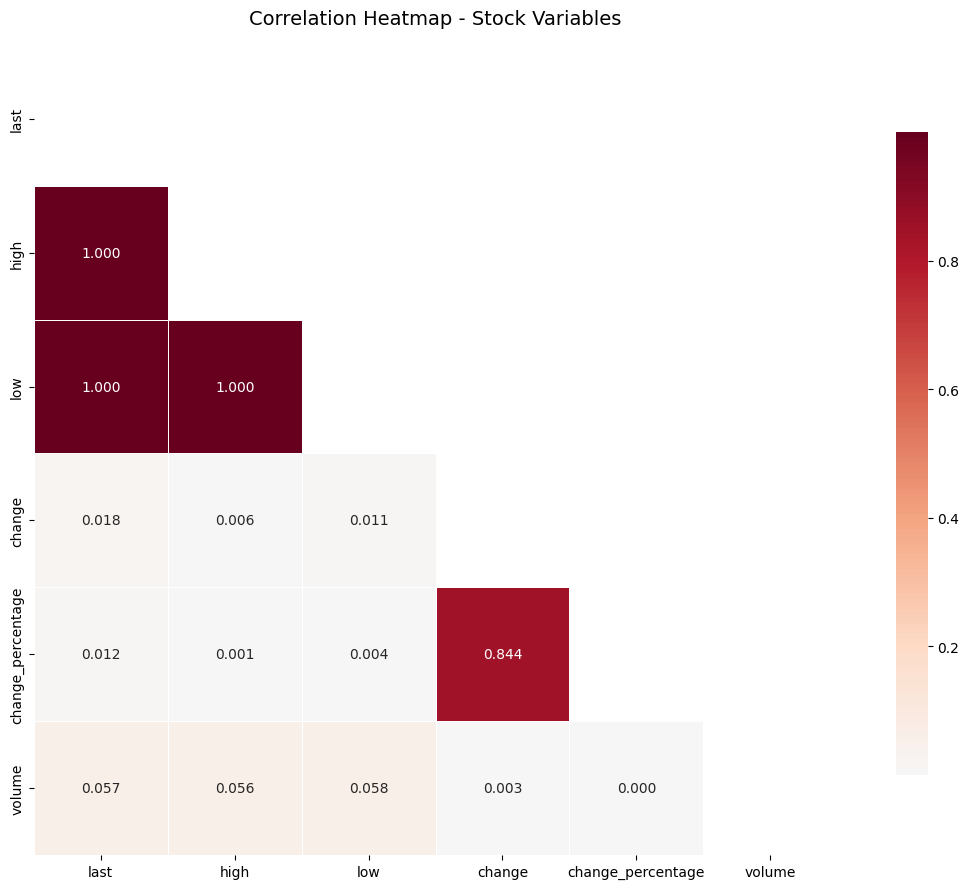

In [54]:
# 4. Correlation Heatmap

plt.figure(figsize=(12, 9))

# Calculate correlation matrix using numpy
correlation_matrix = np.corrcoef(numeric_data.T)  # Transpose to get feature correlation

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

# Create DataFrame for seaborn heatmap

corr_data = pd.DataFrame(correlation_matrix, index=feature_names, columns=feature_names)

sb.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8},
            mask=mask, linewidths=0.5)

plt.title('Correlation Heatmap - Stock Variables', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [55]:
# Print basic statistics
print("Stock Data Summary:")
print(data_numeric.describe())

Stock Data Summary:
                last           high            low         change  \
count  135328.000000  135328.000000  135328.000000  135328.000000   
mean      232.179260     234.416809     229.665015      -0.014093   
std       135.872296     137.059865     134.432782       5.984421   
min        40.730000      41.070000      40.690000    -134.930000   
25%       131.290000     134.370000     129.160000      -1.380000   
50%       224.290000     226.130000     221.510000       0.090000   
75%       305.690000     308.670000     302.510000       1.780000   
max       796.640000     798.570000     787.490000      58.300000   

       change_percentage         volume  
count      135328.000000  135328.000000  
mean            0.023468      52.988492  
std             2.020378     157.628794  
min           -23.060000       1.000000  
25%            -0.740000       3.230000  
50%             0.050000       7.570000  
75%             0.940000      17.350000  
max            18.7200

# Model utilities (Definions and function personalisations)

In [56]:
# Any function that needs to be personalised (ex: Cross validation), if none, you don't need to have this part.

def time_series_cross_validation(data, target_col='last', feature_cols=None, 
                                degree=2, n_splits=5, test_size_days=30, 
                                gap_days=0, min_train_size_days=90):
    """
    Perform time-series cross validation for polynomial regression on stock data.
    
    Parameters:
    -----------
    data : pd.DataFrame
        Stock data with timestamp column
    target_col : str
        Column name for target variable (default: 'last')
    feature_cols : list
        List of feature column names. If None, uses ['high', 'low', 'volume', 'change_percentage']
    degree : int
        Degree of polynomial features (default: 2)
    n_splits : int
        Number of CV splits (default: 5)
    test_size_days : int
        Size of test set in days (default: 30)
    gap_days : int
        Gap between train and test sets in days (default: 0)
    min_train_size_days : int
        Minimum training set size in days (default: 90)
    
    Returns:
    --------
    dict : Cross validation results with metrics for each fold
    """
    
    # Ensure data is sorted by timestamp
    data_sorted = data.copy().sort_values('timestamp')
    data_sorted['timestamp'] = pd.to_datetime(data_sorted['timestamp'])
    
    # Set default feature columns if not provided
    if feature_cols is None:
        feature_cols = ['high', 'low', 'volume', 'change_percentage']
    
    # Remove any rows with missing values in required columns
    required_cols = feature_cols + [target_col, 'timestamp']
    data_clean = data_sorted[required_cols].dropna()
    
    # Initialize results storage
    cv_results = {
        'fold': [],
        'train_start': [],
        'train_end': [],
        'test_start': [],
        'test_end': [],
        'train_size': [],
        'test_size': [],
        'mse': [],
        'mae': [],
        'r2': [],
        'predictions': [],
        'actual': []
    }
    
    # Get date range
    start_date = data_clean['timestamp'].min()
    end_date = data_clean['timestamp'].max()
    total_days = (end_date - start_date).days
    
    # Calculate split points
    test_size_delta = timedelta(days=test_size_days)
    gap_delta = timedelta(days=gap_days)
    min_train_delta = timedelta(days=min_train_size_days)
    
    # Perform time-series splits
    for fold in range(n_splits):
        # Calculate test period end (working backwards from end_date)
        test_end = end_date - timedelta(days=fold * test_size_days)
        test_start = test_end - test_size_delta
        
        # Calculate train period end (with gap)
        train_end = test_start - gap_delta
        
        # Calculate train period start
        # For first fold, use minimum training size
        # For subsequent folds, expand training window
        if fold == 0:
            train_start = train_end - min_train_delta
        else:
            # Expanding window: use more historical data for later folds
            additional_days = fold * (test_size_days // 2)  # Add some historical data each fold
            train_start = train_end - min_train_delta - timedelta(days=additional_days)
        
        # Ensure train_start is not before our data starts
        train_start = max(train_start, start_date)
        
        # Skip if we don't have enough data
        if train_start >= train_end or test_start >= test_end:
            continue
            
        # Create train and test sets
        train_mask = (data_clean['timestamp'] >= train_start) & (data_clean['timestamp'] < train_end)
        test_mask = (data_clean['timestamp'] >= test_start) & (data_clean['timestamp'] < test_end)
        
        train_data = data_clean[train_mask]
        test_data = data_clean[test_mask]
        
        # Skip if insufficient data
        if len(train_data) < 10 or len(test_data) < 5:
            continue
        
        # Prepare features and targets
        X_train = train_data[feature_cols].values
        y_train = train_data[target_col].values
        X_test = test_data[feature_cols].values
        y_test = test_data[target_col].values
        
        # Create polynomial regression pipeline
        poly_reg = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('linear', LinearRegression())
        ])
        
        # Train model
        poly_reg.fit(X_train, y_train)
        
        # Make predictions
        y_pred = poly_reg.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        cv_results['fold'].append(fold + 1)
        cv_results['train_start'].append(train_start)
        cv_results['train_end'].append(train_end)
        cv_results['test_start'].append(test_start)
        cv_results['test_end'].append(test_end)
        cv_results['train_size'].append(len(train_data))
        cv_results['test_size'].append(len(test_data))
        cv_results['mse'].append(mse)
        cv_results['mae'].append(mae)
        cv_results['r2'].append(r2)
        cv_results['predictions'].append(y_pred)
        cv_results['actual'].append(y_test)
        
        print(f"Fold {fold + 1}:")
        print(f"  Train: {train_start.date()} to {train_end.date()} ({len(train_data)} samples)")
        print(f"  Test:  {test_start.date()} to {test_end.date()} ({len(test_data)} samples)")
        print(f"  MSE: {mse:.6f}, MAE: {mae:.6f}, R²: {r2:.6f}")
        print()

    return cv_results

In [57]:
# Example usage:

cv_results = time_series_cross_validation(
    data, 
    target_col='last',
    feature_cols=['high', 'low', 'volume', 'change_percentage'],
    degree=2,
    n_splits=5,
    test_size_days=30,
    gap_days=1  # 1-day gap to prevent data leakage
)

# Calculate summary statistics
if cv_results['mse']:
    print("Cross-Validation Summary:")
    print(f"Average MSE: {np.mean(cv_results['mse']):.6f} (±{np.std(cv_results['mse']):.6f})")
    print(f"Average MAE: {np.mean(cv_results['mae']):.6f} (±{np.std(cv_results['mae']):.6f})")
    print(f"Average R²:  {np.mean(cv_results['r2']):.6f} (±{np.std(cv_results['r2']):.6f})")

Fold 1:
  Train: 2025-05-20 to 2025-08-18 (64890 samples)
  Test:  2025-08-19 to 2025-09-18 (23554 samples)
  MSE: 1.164547, MAE: 0.705565, R²: 0.999947

Fold 2:
  Train: 2025-04-05 to 2025-07-19 (75720 samples)
  Test:  2025-07-20 to 2025-08-19 (21570 samples)
  MSE: 2.239067, MAE: 0.874375, R²: 0.999892

Fold 3:
  Train: 2025-03-17 to 2025-06-19 (67910 samples)
  Test:  2025-06-20 to 2025-07-20 (21570 samples)
  MSE: 1.313150, MAE: 0.729658, R²: 0.999932

Fold 4:
  Train: 2025-03-17 to 2025-05-20 (46160 samples)
  Test:  2025-05-21 to 2025-06-20 (21750 samples)
  MSE: 1.338022, MAE: 0.762710, R²: 0.999919

Fold 5:
  Train: 2025-03-17 to 2025-04-20 (24560 samples)
  Test:  2025-04-21 to 2025-05-21 (21600 samples)
  MSE: 3.026248, MAE: 1.017600, R²: 0.999806

Cross-Validation Summary:
Average MSE: 1.816207 (±0.714058)
Average MAE: 0.817982 (±0.115344)
Average R²:  0.999899 (±0.000050)


# Model Training and evaluation

## Definitions

**MSE (Mean Squared Error):**
The average of the squared differences between predicted and actual values. It's calculated as the sum of (predicted - actual)² divided by the number of observations. MSE penalizes larger errors more heavily due to the squaring operation and is always non-negative.

**MAE (Mean Absolute Error):**
The average of the absolute differences between predicted and actual values. It's calculated as the sum of |predicted - actual| divided by the number of observations. MAE treats all errors equally regardless of their magnitude and is more robust to outliers than MSE.

**R² (R-squared, Coefficient of Determination):**
A measure that indicates the proportion of variance in the dependent variable that's explained by the independent variables in the model. R² ranges from 0 to 1, where 1 means the model explains all the variance and 0 means it explains none. Higher values indicate better model fit.

**RMSE (Root Mean Squared Error):**
The square root of MSE, which brings the error metric back to the same units as the original data. RMSE is more interpretable than MSE since it's in the same scale as the target variable, while still penalizing larger errors more than smaller ones.

# Training

In [84]:
# Training configuration
poly_degree = 10
train_ratio = 0.5
target_col = 'last'
feature_cols = ['high', 'low', 'volume', 'change_percentage']
validation_split = False

In [85]:
# Training (training time)

# Ensure data is sorted by timestamp and clean
data_sorted = data.copy().sort_values('timestamp')
data_sorted['timestamp'] = pd.to_datetime(data_sorted['timestamp'])

# Remove missing values
required_cols = feature_cols + [target_col, 'timestamp']
data_clean = data_sorted[required_cols].dropna()

print(f"Training on {len(data_clean)} samples")
print(f"Features: {feature_cols}")
print(f"Target: {target_col}")
print(f"Polynomial degree: {poly_degree}")

# Time-based split
n_samples = len(data_clean)

if validation_split:
    # Use train_ratio for train set, split remaining between val and test
    train_end_idx = int(n_samples * train_ratio)
    remaining_samples = n_samples - train_end_idx
    val_size = remaining_samples // 2
    val_end_idx = train_end_idx + val_size
    
    train_data = data_clean.iloc[:train_end_idx]
    val_data = data_clean.iloc[train_end_idx:val_end_idx]
    test_data = data_clean.iloc[val_end_idx:]
    
    print(f"\nData splits:")
    print(f"Train: {len(train_data)} samples ({train_data['timestamp'].min().date()} to {train_data['timestamp'].max().date()})")
    print(f"Validation: {len(val_data)} samples ({val_data['timestamp'].min().date()} to {val_data['timestamp'].max().date()})")
    print(f"Test: {len(test_data)} samples ({test_data['timestamp'].min().date()} to {test_data['timestamp'].max().date()})")
else:
    train_end_idx = int(n_samples * train_ratio)
    train_data = data_clean.iloc[:train_end_idx]
    test_data = data_clean.iloc[train_end_idx:]
    val_data = None
    
    print(f"\nData splits:")
    print(f"Train: {len(train_data)} samples ({train_data['timestamp'].min().date()} to {train_data['timestamp'].max().date()})")
    print(f"Test: {len(test_data)} samples ({test_data['timestamp'].min().date()} to {test_data['timestamp'].max().date()})")

# Prepare training features and targets
X_train = train_data[feature_cols].values
y_train = train_data[target_col].values

# Create and train the polynomial regression model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('linear', LinearRegression())
])

print(f"\nTraining polynomial regression model...")
train_start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - train_start_time

print(f"Training completed in {training_time:.4f} seconds")

Training on 135328 samples
Features: ['high', 'low', 'volume', 'change_percentage']
Target: last
Polynomial degree: 10

Data splits:
Train: 67664 samples (2025-03-17 to 2025-06-18)
Test: 67664 samples (2025-06-18 to 2025-09-18)

Training polynomial regression model...
Training completed in 6.4990 seconds


In [96]:
# Evaluation

# Evaluate on training set
X_train = train_data[feature_cols].values
y_train = train_data[target_col].values
train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Training Performance:")
print(f"MSE: {train_mse:.6f}")
print(f"MAE: {train_mae:.6f}")
print(f"R²:  {train_r2:.6f}")
print(f"RMSE: {train_rmse:.6f}")

# Evaluate on validation set if available
if val_data is not None and len(val_data) > 0:
    X_val = val_data[feature_cols].values
    y_val = val_data[target_col].values
    val_pred = model.predict(X_val)
    
    val_mse = mean_squared_error(y_val, val_pred)
    val_mae = mean_absolute_error(y_val, val_pred)
    val_r2 = r2_score(y_val, val_pred)
    val_rmse = np.sqrt(val_mse)
    
    print(f"\nValidation Performance:")
    print(f"MSE: {val_mse:.6f}")
    print(f"MAE: {val_mae:.6f}")
    print(f"R²:  {val_r2:.6f}")
    print(f"RMSE: {val_rmse:.6f}")

# Evaluate on test set
if test_data is not None and len(test_data) > 0:
    X_test = test_data[feature_cols].values
    y_test = test_data[target_col].values
    test_pred = model.predict(X_test)
    
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(test_mse)
    
    print(f"\nTest Performance:")
    print(f"MSE: {test_mse:.6f}")
    print(f"MAE: {test_mae:.6f}")
    print(f"R²:  {test_r2:.6f}")
    print(f"RMSE: {test_rmse:.6f}")

# Feature importance analysis
feature_names = model.named_steps['poly'].get_feature_names_out(feature_cols)
coefficients = model.named_steps['linear'].coef_

print(f"\nTop 10 Most Important Features (by absolute coefficient value):")
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: abs(x[1]), reverse=True)

for i, (feature, coef) in enumerate(coef_importance[:10]):
    print(f"{i+1:2d}. {feature:25s}: {coef:10.6f}")

Training Performance:
MSE: 3883.346941
MAE: 51.969381
R²:  0.758484
RMSE: 62.316506

Test Performance:
MSE: 23517927.933157
MAE: 731.960991
R²:  -1134.606776
RMSE: 4849.528630

Top 10 Most Important Features (by absolute coefficient value):
 1. low^9                    :  -0.000000
 2. high^9                   :   0.000000
 3. high^8                   :   0.000000
 4. high^7 low^2             :  -0.000000
 5. high^3 low^6             :   0.000000
 6. high^2 low^7             :   0.000000
 7. high^7 low               :   0.000000
 8. high^6 low^3             :  -0.000000
 9. high^8 volume            :   0.000000
10. low^8 volume             :   0.000000


In [97]:
# Prediction

df = pd.read_csv("data/test_1.csv")

cleaned_test_data = clean_data(df)

# Make predictions on new data
def make_predictions(model, new_data, feature_cols):
    """Make predictions on new data"""
    X_new = new_data[feature_cols].values
    predictions = model.predict(X_new)
    return predictions

# Example: Predict on the test set
test_predictions = make_predictions(model, cleaned_test_data, feature_cols)
print(test_predictions)

[171.232681   157.9146441  248.32772371 157.93307741 541.81010535
 157.9146441  541.81010535 248.32772371 541.81010538 158.9972963 ]


In [79]:
# Evaluation (time + metrics)

In [98]:
def plot_regression_performance(figsize=(20, 15)):
    """
    Comprehensive visualization for polynomial regression model performance.
    Adapted for regression tasks with improved handling of large datasets.
    """
    
    fig, axes = plt.subplots(3, 3, figsize=figsize)
    
    # Check if we have test data and predictions
    if test_data is not None and len(test_data) > 0:
        actual = y_test
        predicted = test_pred
        
        # 1. Actual vs Predicted Scatter Plot
        axes[0, 0].scatter(actual, predicted, alpha=0.6, color='blue', s=30)
        min_val, max_val = min(actual.min(), predicted.min()), max(actual.max(), predicted.max())
        axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        axes[0, 0].set_xlabel('Actual Values')
        axes[0, 0].set_ylabel('Predicted Values')
        axes[0, 0].set_title('Actual vs Predicted')
        axes[0, 0].legend()
        
        # Add R² and RMSE to the plot
        axes[0, 0].text(0.05, 0.95, f'R² = {test_r2:.3f}\nRMSE = {test_rmse:.3f}', 
                       transform=axes[0, 0].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       verticalalignment='top')
        
        # 2. Residuals vs Predicted
        residuals = actual - predicted
        axes[0, 1].scatter(predicted, residuals, alpha=0.6, color='green', s=30)
        axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
        axes[0, 1].set_xlabel('Predicted Values')
        axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
        axes[0, 1].set_title('Residuals vs Predicted')
        
        # Add trend line to residuals
        z = np.polyfit(predicted, residuals, 1)
        p = np.poly1d(z)
        axes[0, 1].plot(sorted(predicted), p(sorted(predicted)), "orange", linewidth=2, alpha=0.8)
        
        # 3. QQ Plot for Residuals (Normality Check)
        stats.probplot(residuals, dist="norm", plot=axes[0, 2])
        axes[0, 2].set_title('Q-Q Plot of Residuals')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Time Series Plot
        axes[1, 0].plot(test_data['timestamp'], actual, label='Actual', alpha=0.8, linewidth=2)
        axes[1, 0].plot(test_data['timestamp'], predicted, label='Predicted', alpha=0.8, linewidth=2)
        axes[1, 0].set_xlabel('Time')
        axes[1, 0].set_ylabel('Stock Price')
        axes[1, 0].set_title('Time Series: Actual vs Predicted')
        axes[1, 0].legend()
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Fill between for visual clarity
        axes[1, 0].fill_between(test_data['timestamp'], actual, predicted, alpha=0.2, color='gray')
        
        # 5. Error Distribution (Histogram of Residuals)
        axes[1, 1].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 1].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.3f}')
        axes[1, 1].set_xlabel('Residuals')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Distribution of Residuals')
        axes[1, 1].legend()
        
        # Add normal distribution overlay
        mu, sigma = stats.norm.fit(residuals)
        x = np.linspace(residuals.min(), residuals.max(), 100)
        y = stats.norm.pdf(x, mu, sigma) * len(residuals) * (residuals.max() - residuals.min()) / 30
        axes[1, 1].plot(x, y, 'orange', linewidth=2, alpha=0.8, label='Normal Fit')
        axes[1, 1].legend()
        
        # 6. Percentage Error vs Actual Values
        percentage_errors = 100 * np.abs(residuals) / np.abs(actual)
        axes[1, 2].scatter(actual, percentage_errors, alpha=0.6, color='purple', s=30)
        axes[1, 2].set_xlabel('Actual Values')
        axes[1, 2].set_ylabel('Absolute Percentage Error (%)')
        axes[1, 2].set_title('Percentage Error vs Actual Values')
        
        # Add MAPE to the plot
        mape = mean_absolute_percentage_error(actual, predicted) * 100
        axes[1, 2].text(0.05, 0.95, f'MAPE: {mape:.2f}%', 
                       transform=axes[1, 2].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       verticalalignment='top')
    
    # 7. Feature Importance (Top 10)
    if len(coef_importance) > 0:
        top_features = coef_importance[:10]  # Top 10
        features, coeffs = zip(*top_features)
        
        # Create colors based on coefficient sign
        colors = ['red' if c < 0 else 'green' for c in coeffs]
        
        y_pos = np.arange(len(features))
        bars = axes[2, 0].barh(y_pos, [abs(c) for c in coeffs], color=colors, alpha=0.7)
        axes[2, 0].set_yticks(y_pos)
        axes[2, 0].set_yticklabels([f[:15] + '...' if len(f) > 15 else f for f in features])
        axes[2, 0].set_xlabel('Absolute Coefficient Value')
        axes[2, 0].set_title('Top 10 Feature Importance')
        
        # Add legend for colors
        axes[2, 0].text(0.7, 0.95, 'Green: Positive\nRed: Negative', 
                       transform=axes[2, 0].transAxes,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       verticalalignment='top')
    
    # 8. Model Performance Metrics Summary
    axes[2, 1].axis('off')
    
    # Create metrics summary text
    metrics_text = "Model Performance Summary\n" + "="*30 + "\n\n"
    
    metrics_text += "Training Metrics:\n"
    metrics_text += f"  R² Score: {train_r2:.4f}\n"
    metrics_text += f"  RMSE: {train_rmse:.4f}\n"
    metrics_text += f"  MAE: {train_mae:.4f}\n\n"
    
    if val_data is not None and len(val_data) > 0:
        metrics_text += "Validation Metrics:\n"
        metrics_text += f"  R² Score: {val_r2:.4f}\n"
        metrics_text += f"  RMSE: {val_rmse:.4f}\n"
        metrics_text += f"  MAE: {val_mae:.4f}\n\n"
    
    if test_data is not None and len(test_data) > 0:
        metrics_text += "Test Metrics:\n"
        metrics_text += f"  R² Score: {test_r2:.4f}\n"
        metrics_text += f"  RMSE: {test_rmse:.4f}\n"
        metrics_text += f"  MAE: {test_mae:.4f}\n"
        mape = mean_absolute_percentage_error(actual, predicted) * 100
        metrics_text += f"  MAPE: {mape:.2f}%\n"
    
    metrics_text += f"\nTraining Time: {training_time:.4f} seconds"
    
    axes[2, 1].text(0.05, 0.95, metrics_text, transform=axes[2, 1].transAxes, 
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
    
    # 9. Train vs Test Performance Comparison
    if test_data is not None and len(test_data) > 0:
        metrics_names = ['R² Score', 'RMSE', 'MAE']
        train_scores = [train_r2, train_rmse, train_mae]
        test_scores = [test_r2, test_rmse, test_mae]
        
        if val_data is not None and len(val_data) > 0:
            val_scores = [val_r2, val_rmse, val_mae]
            
            x = np.arange(len(metrics_names))
            width = 0.25
            
            axes[2, 2].bar(x - width, train_scores, width, label='Train', alpha=0.8)
            axes[2, 2].bar(x, val_scores, width, label='Validation', alpha=0.8)
            axes[2, 2].bar(x + width, test_scores, width, label='Test', alpha=0.8)
        else:
            x = np.arange(len(metrics_names))
            width = 0.35
            
            axes[2, 2].bar(x - width/2, train_scores, width, label='Train', alpha=0.8)
            axes[2, 2].bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
        
        axes[2, 2].set_xlabel('Metrics')
        axes[2, 2].set_ylabel('Score')
        axes[2, 2].set_title('Train vs Test Performance')
        axes[2, 2].set_xticks(x)
        axes[2, 2].set_xticklabels(metrics_names)
        axes[2, 2].legend()
        axes[2, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

NameError: name 'y_test' is not defined

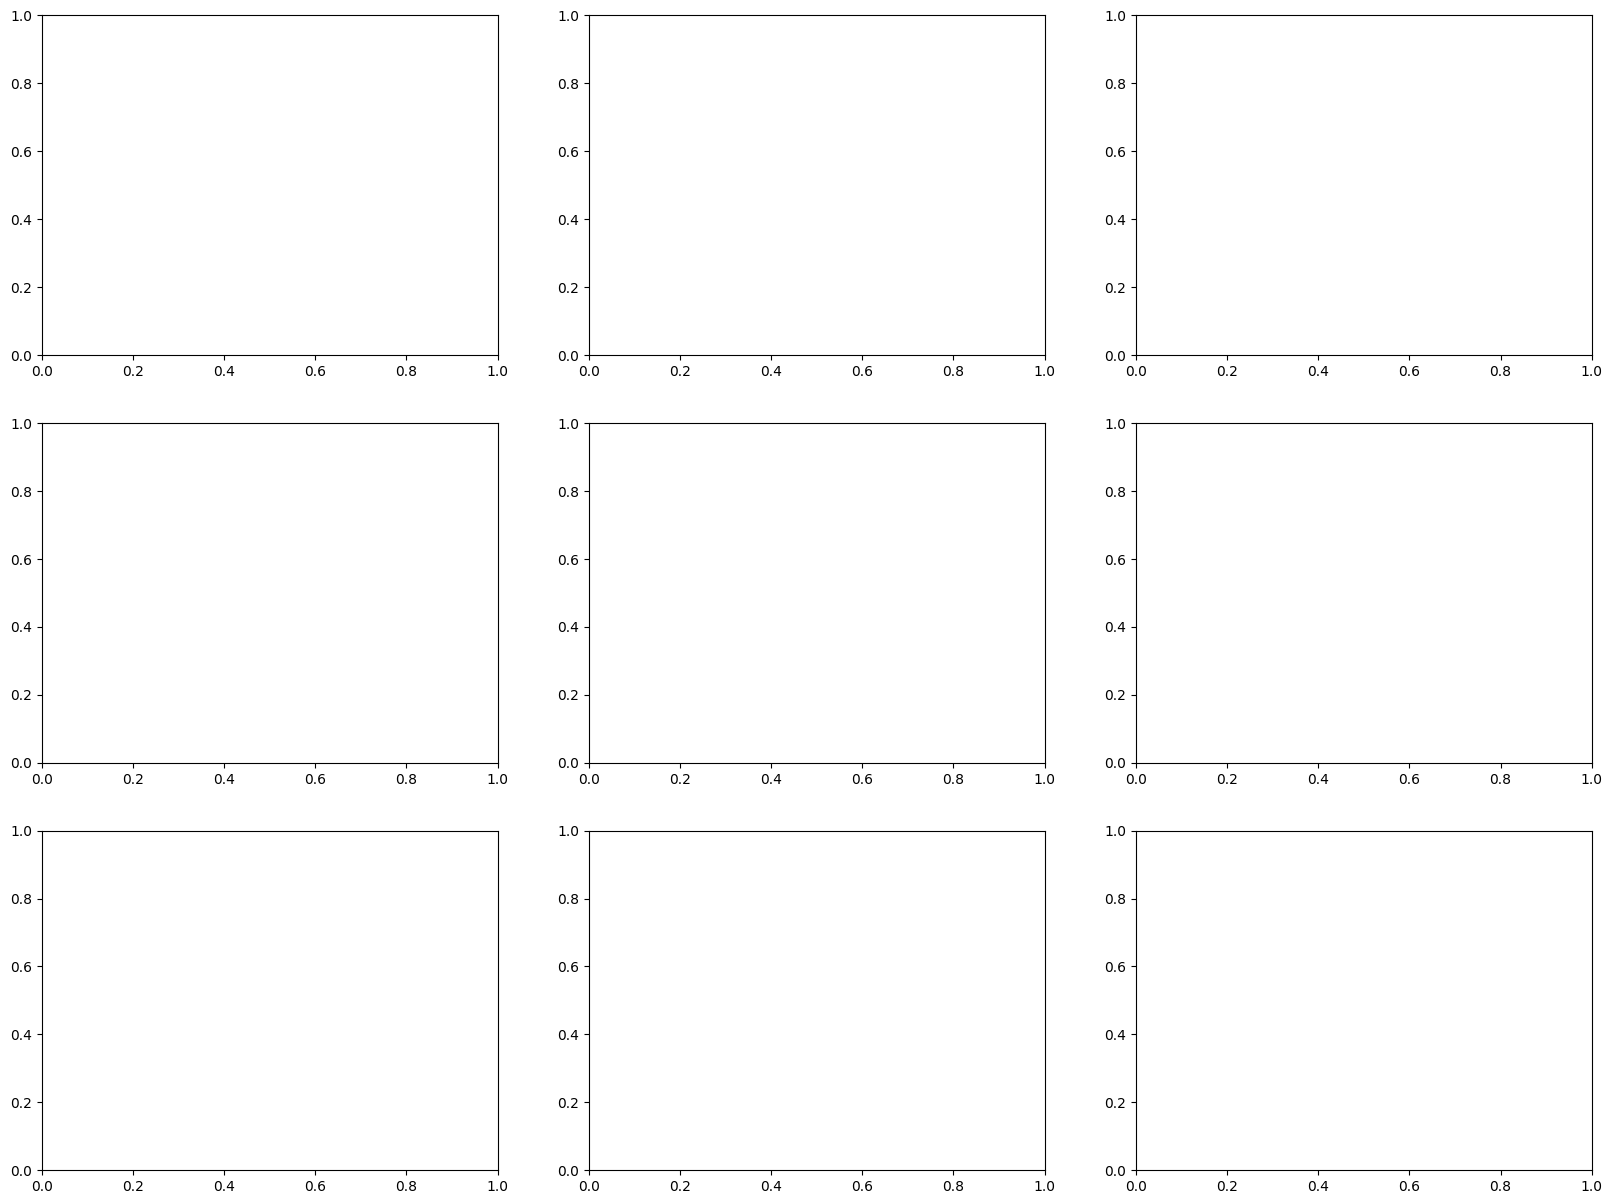

In [95]:
# Usage
plot_regression_performance()

In [ ]:
# Shap (waterfall plot / beeswarm / shap heatmap / shap decision plot / dependence plot)